In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
train_set = pd.read_csv('datasets/titanic/train.csv')
test_set = pd.read_csv('datasets/titanic/test.csv')

In [3]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




The attributes have the following meaning:

   * PassengerId: a unique identifier for each passenger
   * Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
   * Pclass: passenger class.
   * Name, Sex, Age: self-explanatory
   * SibSp: how many siblings & spouses of the passenger aboard the Titanic.
   * Parch: how many children & parents of the passenger aboard the Titanic.
   * Ticket: ticket id
   * Fare: price paid (in pounds)
   * Cabin: passenger's cabin number
   * Embarked: where the passenger embarked the Titanic



In [5]:
#Setting the Passenger ID as the dataframe index
train_set = train_set.set_index("PassengerId")
test_set = test_set.set_index("PassengerId")

In [6]:
X_train = train_set.copy()

In [7]:
y_train = X_train['Survived']

In [8]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [9]:
X_train = X_train.drop(columns='Survived')

In [10]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
X_train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [12]:
X_train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
              ..
C99            1
C111           1
A23            1
C82            1
E36            1
Name: Cabin, Length: 147, dtype: int64

In [13]:
X_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


* Features with null values: Age, Cabin and Embarked 

<AxesSubplot:>

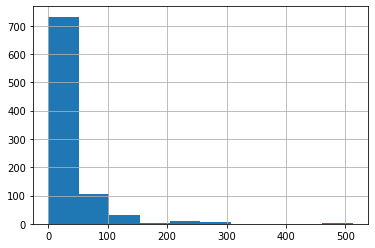

In [15]:
X_train['Fare'].hist()

<AxesSubplot:>

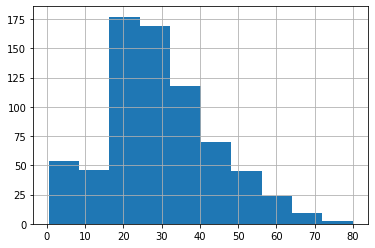

In [16]:
X_train['Age'].hist()

<AxesSubplot:>

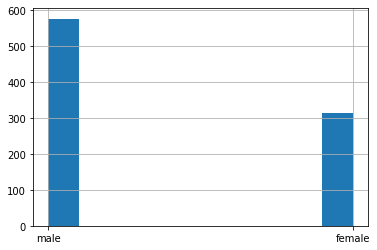

In [17]:
X_train['Sex'].hist()

<AxesSubplot:>

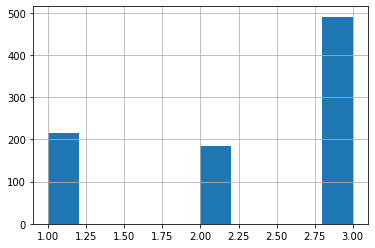

In [18]:
X_train['Pclass'].hist()

In [19]:
X_train['namelength']= X_train['Name'].str.len()

In [20]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,namelength
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,40


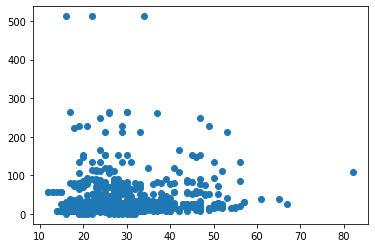

In [21]:
plt.scatter(X_train['namelength'], X_train['Fare'])

<AxesSubplot:>

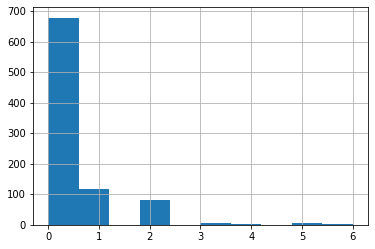

In [22]:
X_train['Parch'].hist()

In [23]:
X_train = X_train.drop(columns='Name')

In [24]:
X_train = X_train.drop(columns='Ticket')

In [25]:
X_train['sexbin'] = (X_train['Sex'] == 'male')

In [26]:
X_train = X_train.drop(columns='Sex')

In [27]:
X_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,namelength,sexbin
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,NaN,S,23,True
2,1,38.0,1,0,71.2833,C85,C,51,False
3,3,26.0,0,0,7.9250,NaN,S,22,False
4,1,35.0,1,0,53.1000,C123,S,44,False
5,3,35.0,0,0,8.0500,NaN,S,24,True
6,3,NaN,0,0,8.4583,NaN,Q,16,True
7,1,54.0,0,0,51.8625,E46,S,23,True
8,3,2.0,3,1,21.0750,NaN,S,30,True
9,3,27.0,0,2,11.1333,NaN,S,49,False


In [28]:
median = X_train['Age'].median()

In [29]:
X_train['Age'].fillna(median, inplace=True)

In [30]:
X_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,namelength,sexbin
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,NaN,S,23,True
2,1,38.0,1,0,71.2833,C85,C,51,False
3,3,26.0,0,0,7.9250,NaN,S,22,False
4,1,35.0,1,0,53.1000,C123,S,44,False
5,3,35.0,0,0,8.0500,NaN,S,24,True
6,3,28.0,0,0,8.4583,NaN,Q,16,True
7,1,54.0,0,0,51.8625,E46,S,23,True
8,3,2.0,3,1,21.0750,NaN,S,30,True
9,3,27.0,0,2,11.1333,NaN,S,49,False


In [31]:
median

28.0

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Cabin       204 non-null    object 
 6   Embarked    889 non-null    object 
 7   namelength  891 non-null    int64  
 8   sexbin      891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 63.5+ KB


In [33]:
from sklearn.preprocessing import OrdinalEncoder

X_train_cat = X_train[['Cabin', 'Embarked']]

In [34]:
X_train_cat

,Cabin,Embarked
PassengerId,,
1,NaN,S
2,C85,C
3,NaN,S
4,C123,S
5,NaN,S
...,...,...
887,NaN,S
888,B42,S
889,NaN,S


In [35]:
X_train_cat['Cabin'].fillna(value='0', inplace=True)

/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [36]:
X_train_cat['Embarked'].fillna(value='0', inplace=True)

In [37]:
X_train_cat

,Cabin,Embarked
PassengerId,,
1,0,S
2,C85,C
3,0,S
4,C123,S
5,0,S
...,...,...
887,0,S
888,B42,S
889,0,S


In [38]:
ordinal_encoder = OrdinalEncoder()

In [39]:
X_train_cat_encod = ordinal_encoder.fit_transform(X_train_cat)

In [40]:
X_train_cat_encod

array([[ 0.,  3.],
       [82.,  1.],
       [ 0.,  3.],
       ...,
       [ 0.,  3.],
       [61.,  1.],
       [ 0.,  2.]])

In [41]:
X_train_num = X_train[['Age', 'Fare', 'namelength']]

In [42]:
X_train_num

,Age,Fare,namelength
PassengerId,,,
1,22.0,7.2500,23
2,38.0,71.2833,51
3,26.0,7.9250,22
4,35.0,53.1000,44
5,35.0,8.0500,24
...,...,...,...
887,27.0,13.0000,21
888,19.0,30.0000,28
889,28.0,23.4500,40


In [43]:
scaler = StandardScaler()

In [44]:
X_train_num_scaled = scaler.fit_transform(X_train_num.astype(np.float64))

In [45]:
X_train_num_scaled

array([[-0.56573646, -0.50244517, -0.42745127],
       [ 0.66386103,  0.78684529,  2.59096206],
       [-0.25833709, -0.48885426, -0.53525175],
       ...,
       [-0.1046374 , -0.17626324,  1.40515682],
       [-0.25833709, -0.04438104, -0.64305222],
       [ 0.20276197, -0.49237783, -0.85865317]])

In [46]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,namelength,sexbin
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,NaN,S,23,True
2,1,38.0,1,0,71.2833,C85,C,51,False
3,3,26.0,0,0,7.9250,NaN,S,22,False
4,1,35.0,1,0,53.1000,C123,S,44,False
5,3,35.0,0,0,8.0500,NaN,S,24,True


In [47]:
X_train_untouched = X_train[['Pclass', 'SibSp', 'Parch', 'sexbin']]

In [48]:
X_train_untouched

,Pclass,SibSp,Parch,sexbin
PassengerId,,,,
1,3,1,0,True
2,1,1,0,False
3,3,0,0,False
4,1,1,0,False
5,3,0,0,True
...,...,...,...,...
887,2,0,0,True
888,1,0,0,False
889,3,1,2,False


In [49]:
X_train_untouched['sexbin'] = X_train_untouched['sexbin'].replace({True: 1, False: 0})

/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
X_train_untouched

,Pclass,SibSp,Parch,sexbin
PassengerId,,,,
1,3,1,0,1
2,1,1,0,0
3,3,0,0,0
4,1,1,0,0
5,3,0,0,1
...,...,...,...,...
887,2,0,0,1
888,1,0,0,0
889,3,1,2,0


In [51]:
X_train_untouched_arr = np.array(X_train_untouched)

In [52]:
X_train_untouched_arr

array([[3, 1, 0, 1],
       [1, 1, 0, 0],
       [3, 0, 0, 0],
       ...,
       [3, 1, 2, 0],
       [1, 0, 0, 1],
       [3, 0, 0, 1]])

I have 3 transformed arrays:
* X_train_untouched_arr (Pclass, SibSp, Parch, sebin)
* X_train_num_scaled (Age, Fare, namelength)
* X_train_cat_encod (Cabin, Embarked)

In [53]:
len(X_train_cat_encod)

891

In [54]:
X_train_ready = np.hstack((X_train_untouched_arr, X_train_num_scaled, X_train_cat_encod))

In [55]:
len(X_train_ready)

891

In [56]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [96]:
X_train_ready[0]

array([ 3.        ,  1.        ,  0.        ,  1.        , -0.56573646,
       -0.50244517, -0.42745127,  0.        ,  3.        ])

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [99]:
params = {'weights':['uniform', 'distance'], 'n_neighbors': [2,4,6,8,10]}

gridsearch = GridSearchCV(knn, params, cv=3, verbose=3, scoring='accuracy')

In [100]:
gridsearch.fit(X_train_ready, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....n_neighbors=2, weights=uniform;, score=0.734 total time=   0.0s
[CV 2/3] END ....n_neighbors=2, weights=uniform;, score=0.700 total time=   0.0s
[CV 3/3] END ....n_neighbors=2, weights=uniform;, score=0.761 total time=   0.0s
[CV 1/3] END ...n_neighbors=2, weights=distance;, score=0.734 total time=   0.0s
[CV 2/3] END ...n_neighbors=2, weights=distance;, score=0.741 total time=   0.0s
[CV 3/3] END ...n_neighbors=2, weights=distance;, score=0.758 total time=   0.0s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.741 total time=   0.0s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.721 total time=   0.0s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.801 total time=   0.0s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.754 total time=   0.0s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.764 total time=   0.0s
[CV 3/3] END ...n_neighbors=4, weights=distance;

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [102]:
gridsearch.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [107]:
params = {'weights':['uniform', 'distance'], 'n_neighbors': [2,4,6,8,10, 32, 64], 'p': [1,2,3]}

gridsearch = GridSearchCV(knn, params, cv=5, verbose=3, scoring='accuracy')

In [108]:
gridsearch.fit(X_train_ready, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END n_neighbors=2, p=1, weights=uniform;, score=0.715 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=uniform;, score=0.736 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=uniform;, score=0.758 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=uniform;, score=0.730 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=uniform;, score=0.798 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=1, weights=distance;, score=0.749 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=distance;, score=0.775 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=distance;, score=0.758 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=distance;, score=0.725 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=distance;, score=0.820 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=2, weights=uniform;, score=0.715 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=2

[CV 3/5] END n_neighbors=8, p=3, weights=uniform;, score=0.775 total time=   0.0s
[CV 4/5] END n_neighbors=8, p=3, weights=uniform;, score=0.753 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=3, weights=uniform;, score=0.815 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=3, weights=distance;, score=0.777 total time=   0.0s
[CV 2/5] END n_neighbors=8, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END n_neighbors=8, p=3, weights=distance;, score=0.775 total time=   0.0s
[CV 4/5] END n_neighbors=8, p=3, weights=distance;, score=0.775 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=3, weights=distance;, score=0.815 total time=   0.0s
[CV 1/5] END n_neighbors=10, p=1, weights=uniform;, score=0.760 total time=   0.0s
[CV 2/5] END n_neighbors=10, p=1, weights=uniform;, score=0.753 total time=   0.0s
[CV 3/5] END n_neighbors=10, p=1, weights=uniform;, score=0.781 total time=   0.0s
[CV 4/5] END n_neighbors=10, p=1, weights=uniform;, score=0.764 total time=   0.0s
[CV 5/5

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 32, 64],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [109]:
gridsearch.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [110]:
gridsearch.best_score_

0.8013746783001695

In [2]:
from sklearn.svm import SVC

svc = SVC()

In [58]:
params = {'C': [1., 3., 9., 27.], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

gridsearch = GridSearchCV(svc, params, cv=5, verbose=3, scoring='accuracy')

In [59]:
gridsearch.fit(X_train_ready, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.799 total time=   0.3s
[CV 2/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.809 total time=   0.1s
[CV 3/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.787 total time=   0.5s
[CV 4/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.753 total time=   4.3s
[CV 5/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.787 total time=   5.1s
[CV 1/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.680 total time=   0.0s
[CV 4/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.708 total time=   0.0s
[CV 5/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.742 total time=   0.0s
[CV 1/5] END ..C=1.0, gamma=auto, kernel=linear;, score=0.799 total time=   0.2s
[CV 2/5] END ..C=1.0, gamma=auto, kernel=linear;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 3.0, 9.0, 27.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=3)

In [60]:
gridsearch.best_score_

0.8125604167974391

In [117]:
gridsearch.best_params_

{'C': 9.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [61]:
gridsearch.best_score_

0.8125604167974391

In [62]:
gridsearch.best_params_

{'C': 9.0, 'gamma': 'auto', 'kernel': 'rbf'}